## Avg morphology/cell fraction as dependent variable + one hot encode cancer types as dependent variable OR biopsy site —> multivariate analysis! Cancer type *morphologies BF correct 

##### Restrict to primary samples
##### How much is cancer type a confounder? Are some cell types lacking in certain cancers

In [ ]:
data = read.table("~/Downloads/lizard_slide_level_features_ALL.csv_SUB",sep = "\t",header = TRUE)
data = read.table("/Users/shayecarver/CellVit/lizard_slide_level_features_ALL.csv",sep = "\t",header = TRUE)


primaries = read.table("/Users/shayecarver/CellVit/datasets_cov/PRIMARIES.txt",sep = "\t",header = FALSE)
length(unique(data$slide_id))

# subset to primary samples
primary_samples = data[data$slide_id %in% primaries$V1,]

[1] 2307

In [77]:
head(primary_samples)
length(unique(primary_samples$slide_id))

,slide_id,type_label,prop_type_label,cell_count,cancer_type,area,perimeter,eccentricity,solidity,orientation,major_axis_length,minor_axis_length,aspect_ratio,circularity,centroid_x,centroid_y
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,BL-14-D14786,all_cells,1.0,42369,Colorectal,107.94113620807666,38.21768677141718,0.7344409777193834,0.927523809804384,0.00493100022622876,14.737752260231531,9.011915795388393,1.689312285731468,0.8925239715132286,8593.274280724114,22707.799428827682
2,BL-14-D14786,immune_cells,0.5866317354669688,24855,Colorectal,88.3823777911889,34.09442192284525,0.7046939081892863,0.9316293257696289,-0.006534824518321442,13.006154677262405,8.493194838554096,1.5643033968297257,0.932121317326776,8455.425507946087,23078.286883926776
3,BL-14-D14786,Connective tissue,0.16471948830512875,6979,Colorectal,104.33170941395615,39.24730000732479,0.8096116873025924,0.9152997078790572,0.0086130049167847,15.923085793767992,8.225777020459446,2.0475858091330674,0.8280820011038075,8967.10216363376,23794.980656254476
4,BL-14-D14786,Eosinophil,0.023908990063489816,1013,Colorectal,82.43534057255677,32.72395533878803,0.6885604615397793,0.929808286559637,0.0718568081143675,12.394256620353499,8.29086290229127,1.5174174156771996,0.9431002547312695,7912.869693978282,24793.81194471866
5,BL-14-D14786,Epithelial,0.24864877622790246,10535,Colorectal,156.47679164689131,47.263541260060364,0.7548251287387805,0.9259357137455981,0.02954289992156862,18.037839132006248,10.75650733713928,1.7469017507369775,0.8417929303448973,8670.852491694352,21113.503891789274
6,BL-14-D14786,Lymphocyte,0.48948523684769524,20739,Colorectal,86.06061044409084,33.686746455762396,0.7076447668204461,0.9317557167625079,-0.016849038814334895,12.900323011098745,8.36942275353201,1.5735994009130445,0.9333787943282121,8544.797892858865,23258.092868508607


[1] 1435

In [78]:
# filter out rows where type_label is "immune_cells" or "all_cells"
primary_lizard_sub = primary_samples[!(primary_samples$type_label %in% c("immune_cells", "all_cells")),]
head(primary_lizard_sub)
colnames(primary_lizard_sub)

primary_lizard_sub$cancer_type <- as.factor(primary_lizard_sub$cancer_type)
primary_lizard_sub$type_label <- as.factor(primary_lizard_sub$type_label)
primary_lizard_sub$prop_type_label <- as.numeric(primary_lizard_sub$prop_type_label)

,slide_id,type_label,prop_type_label,cell_count,cancer_type,area,perimeter,eccentricity,solidity,orientation,major_axis_length,minor_axis_length,aspect_ratio,circularity,centroid_x,centroid_y
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
3,BL-14-D14786,Connective tissue,0.16471948830512875,6979,Colorectal,104.33170941395615,39.24730000732479,0.8096116873025924,0.9152997078790572,0.0086130049167847,15.923085793767992,8.225777020459446,2.0475858091330674,0.8280820011038075,8967.10216363376,23794.980656254476
4,BL-14-D14786,Eosinophil,0.023908990063489816,1013,Colorectal,82.43534057255677,32.72395533878803,0.6885604615397793,0.929808286559637,0.0718568081143675,12.394256620353499,8.29086290229127,1.5174174156771996,0.9431002547312695,7912.869693978282,24793.81194471866
5,BL-14-D14786,Epithelial,0.24864877622790246,10535,Colorectal,156.47679164689131,47.263541260060364,0.7548251287387805,0.9259357137455981,0.02954289992156862,18.037839132006248,10.75650733713928,1.7469017507369775,0.8417929303448973,8670.852491694352,21113.503891789274
6,BL-14-D14786,Lymphocyte,0.48948523684769524,20739,Colorectal,86.06061044409084,33.686746455762396,0.7076447668204461,0.9317557167625079,-0.016849038814334895,12.900323011098745,8.36942275353201,1.5735994009130445,0.9333787943282121,8544.797892858865,23258.092868508607
7,BL-14-D14786,Neutrophil,0.021737591163350563,921,Colorectal,80.0184581976113,32.15271516884065,0.7105316078545147,0.9222963183137363,-0.04443392688178214,12.272044636063308,7.939991839409256,1.5810195009777146,0.931364557563978,9406.057003257329,29840.708469055375
8,BL-14-D14786,Plasma,0.05149991739243315,2182,Colorectal,116.7410632447296,39.425025076795535,0.6816731945837208,0.9352128224631595,0.07110075738124612,14.605976402359202,9.997031449424709,1.4906600138339714,0.9153919390582149,7456.609532538955,17718.519019248397


[1] "slide_id"          "type_label"        "prop_type_label"  
 [4] "cell_count"        "cancer_type"       "area"             
 [7] "perimeter"         "eccentricity"      "solidity"         
[10] "orientation"       "major_axis_length" "minor_axis_length"
[13] "aspect_ratio"      "circularity"       "centroid_x"       
[16] "centroid_y"

In [79]:
# List of features to regress
features <- c("area", "perimeter", "eccentricity", "solidity", "orientation",
              "major_axis_length", "minor_axis_length", "aspect_ratio",
              "circularity", "centroid_x", "centroid_y")

# Store results
all_results <- list()

# Loop through each feature
for (feature in features) {
  formula <- as.formula(paste0(feature, " ~ cancer_type + type_label + prop_type_label"))
  model <- lm(formula, data = primary_lizard_sub)
  s <- summary(model)

  # Extract coefficients
  coef_df <- as.data.frame(coef(s))
  coef_df$term <- rownames(coef_df)
  rownames(coef_df) <- NULL

  # Rename columns
  colnames(coef_df)[1:4] <- c("estimate", "std_error", "t_value", "p_value")

  # Replace inexact p-values (e.g., "<2e-16") with exact values using t-distribution
  coef_df$p_value <- sapply(1:nrow(coef_df), function(i) {
    t_val <- coef_df$t_value[i]
    df_resid <- s$df[2]
    exact_p <- 2 * pt(-abs(t_val), df = df_resid)
    return(exact_p)
  })

  # Add feature column
  coef_df$feature <- feature

  all_results[[feature]] <- coef_df
}

# Combine all results into one data frame
final_df <- do.call(rbind, all_results)
rownames(final_df) <- NULL

# Optional: reorder columns
final_df <- final_df[, c("feature", "term", "estimate", "std_error", "t_value", "p_value")]

# drop intercept
final_df <- final_df[final_df$term != "(Intercept)", ]

# BF correction
final_df$p_value_bonf <- p.adjust(final_df$p_value, method = "bonferroni")
sig_df <- subset(final_df, p_value_bonf < 0.05)

# Remove "cancer_type" or "type_label" from the beginning of the string
sig_df$term <- sub("^cancer_type", "cancer: ", sig_df$term)
sig_df$term <- sub("^type_label", "type: ", sig_df$term)

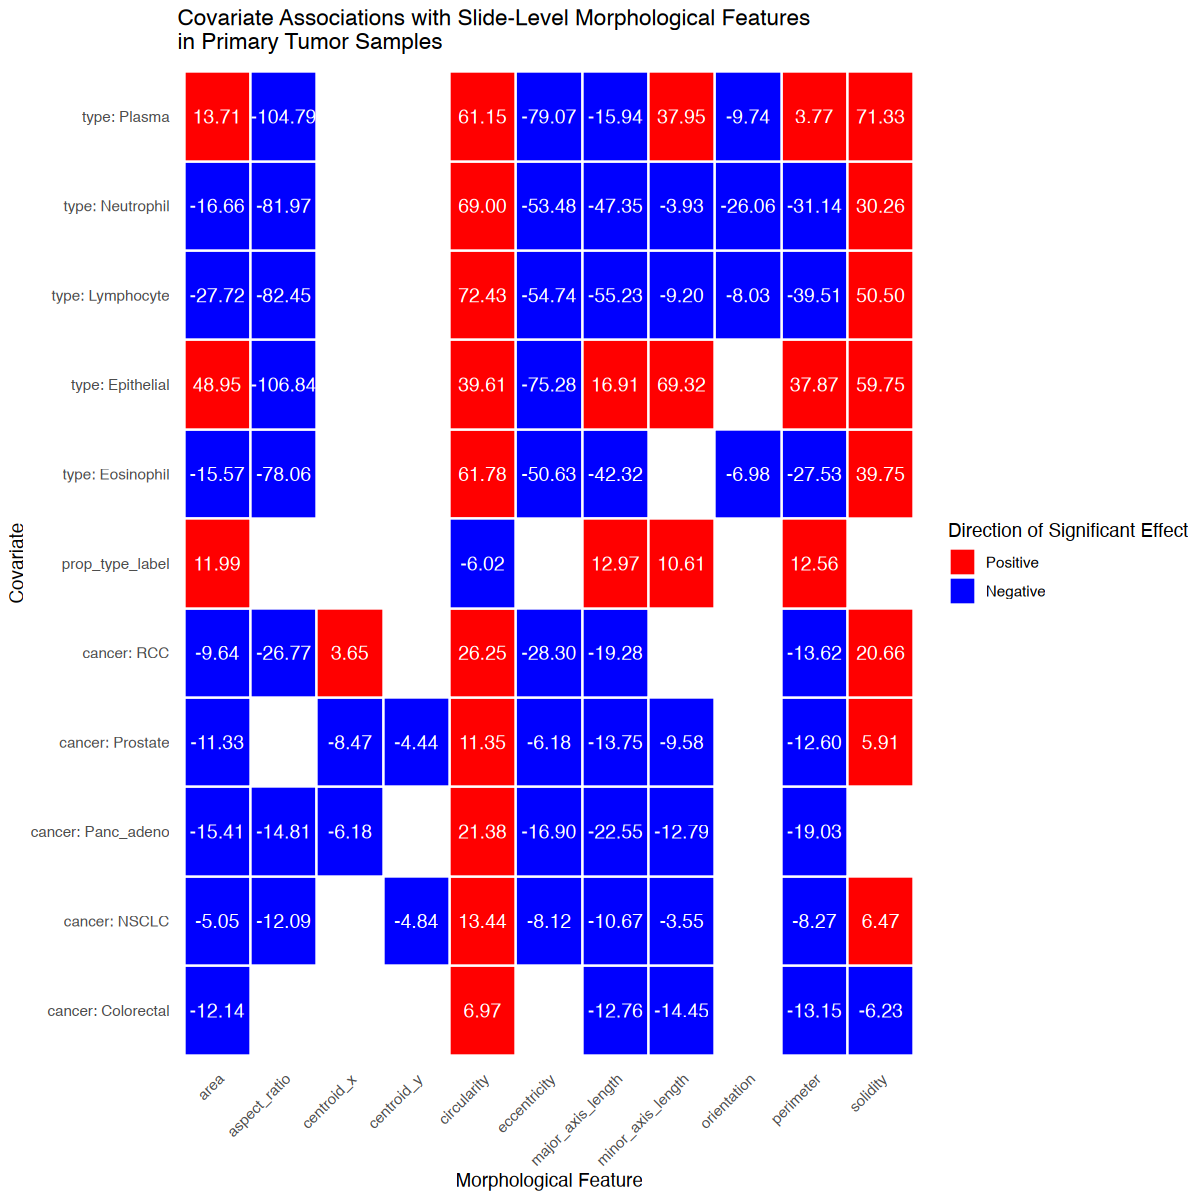

In [89]:
library(ggplot2)
library(dplyr)
library(tidyr)

options(repr.plot.width=10, repr.plot.height=10)


# Set significance threshold
sig_threshold <- 0.05

# Prepare data: assign color and text label only for significant results
plot_df <- sig_df %>%
  mutate(sign = case_when(
    p_value_bonf < sig_threshold & t_value > 0 ~ "positive",
    p_value_bonf < sig_threshold & t_value < 0 ~ "negative",
    TRUE ~ "not_significant"
  )) %>%
  mutate(fill_color = case_when(
    sign == "positive" ~ "red",
    sign == "negative" ~ "blue",
    TRUE ~ NA_character_
  )) %>%
  mutate(label = ifelse(sign != "not_significant", sprintf("%.2f", t_value), NA))

# Set factor levels for consistent ordering
plot_df$sign <- factor(plot_df$sign, levels = c("positive", "negative", "not_significant"))

# Plot with annotations
ggplot(plot_df, aes(x = feature, y = term, fill = fill_color)) +
  geom_tile(color = "white", linewidth = 0.5) +
  geom_text(aes(label = label), color = "white", size = 4) +
  scale_fill_identity(
    name = "Direction of Significant Effect",
    breaks = c("red", "blue"),
    labels = c("Positive", "Negative"),
    guide = "legend"
  ) +
  theme_minimal() +
  labs(
    title = "Covariate Associations with Slide-Level Morphological Features\nin Primary Tumor Samples",
    x = "Morphological Feature",
    y = "Covariate"
  ) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    panel.grid = element_blank()
  )


# Ancestry

In [ ]:
ancestry = read.table("/Users/shayecarver/CellVit/datasets_cov/ancestry_of_slides.txt", sep="\t", header = TRUE)
head(ancestry)

,SAMPLE_ACCESSION_NBR,BIOPSY_SITE,BIOPSY_SITE_TYPE,Predicted_AFR,Predicted_AMR,Predicted_EAS,Predicted_EUR,Predicted_SAS
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,BL-17-N16941,LUNG,PRIMARY,0.000,0.000,0,1.000,0.00
2,BL-14-T12872,LUNG,PRIMARY,0.012,0.984,0,0.004,0.00
3,BL-14-W06497,LIVER,METASTATIC RECURRENCE,0.000,0.000,0,1.000,0.00
4,BL-14-A36651,LUNG,METASTATIC RECURRENCE,0.000,0.000,0,1.000,0.00
5,BL-16-X42771,LIVER,METASTATIC RECURRENCE,0.002,0.216,0,0.702,0.08
6,BL-15-R37419,BOWEL,PRIMARY,0.000,0.000,0,1.000,0.00


In [107]:
data_lizard = read.table("~/Downloads/lizard_slide_level_features_ALL.csv",sep = "\t",header = TRUE)
#data_lizard = data[!(data$type_label %in% c("immune_cells", "all_cells")),]
data_lizard = data[!(data$type_label %in% c("type_label")),]

head(data_lizard)
dim(data_lizard)

,slide_id,type_label,prop_type_label,cell_count,cancer_type,area,perimeter,eccentricity,solidity,orientation,major_axis_length,minor_axis_length,aspect_ratio,circularity,centroid_x,centroid_y
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,BL-14-D14786,all_cells,1.0,42369,Colorectal,107.94113620807666,38.21768677141718,0.7344409777193834,0.927523809804384,0.00493100022622876,14.737752260231531,9.011915795388393,1.689312285731468,0.8925239715132286,8593.274280724114,22707.799428827682
2,BL-14-D14786,immune_cells,0.5866317354669688,24855,Colorectal,88.3823777911889,34.09442192284525,0.7046939081892863,0.9316293257696289,-0.006534824518321442,13.006154677262405,8.493194838554096,1.5643033968297257,0.932121317326776,8455.425507946087,23078.286883926776
3,BL-14-D14786,Connective tissue,0.16471948830512875,6979,Colorectal,104.33170941395615,39.24730000732479,0.8096116873025924,0.9152997078790572,0.0086130049167847,15.923085793767992,8.225777020459446,2.0475858091330674,0.8280820011038075,8967.10216363376,23794.980656254476
4,BL-14-D14786,Eosinophil,0.023908990063489816,1013,Colorectal,82.43534057255677,32.72395533878803,0.6885604615397793,0.929808286559637,0.0718568081143675,12.394256620353499,8.29086290229127,1.5174174156771996,0.9431002547312695,7912.869693978282,24793.81194471866
5,BL-14-D14786,Epithelial,0.24864877622790246,10535,Colorectal,156.47679164689131,47.263541260060364,0.7548251287387805,0.9259357137455981,0.02954289992156862,18.037839132006248,10.75650733713928,1.7469017507369775,0.8417929303448973,8670.852491694352,21113.503891789274
6,BL-14-D14786,Lymphocyte,0.48948523684769524,20739,Colorectal,86.06061044409084,33.686746455762396,0.7076447668204461,0.9317557167625079,-0.016849038814334895,12.900323011098745,8.36942275353201,1.5735994009130445,0.9333787943282121,8544.797892858865,23258.092868508607


[1] 18413    16

In [108]:
merged_df <- left_join(data_lizard, ancestry, by = c("slide_id" = "SAMPLE_ACCESSION_NBR"))
head(merged_df)
dim(merged_df)
colnames(merged_df)

,slide_id,type_label,prop_type_label,cell_count,cancer_type,area,perimeter,eccentricity,solidity,orientation,...,circularity,centroid_x,centroid_y,BIOPSY_SITE,BIOPSY_SITE_TYPE,Predicted_AFR,Predicted_AMR,Predicted_EAS,Predicted_EUR,Predicted_SAS
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,BL-14-D14786,all_cells,1.0,42369,Colorectal,107.94113620807666,38.21768677141718,0.7344409777193834,0.927523809804384,0.00493100022622876,...,0.8925239715132286,8593.274280724114,22707.799428827682,BOWEL,PRIMARY,0,0,0,1,0
2,BL-14-D14786,immune_cells,0.5866317354669688,24855,Colorectal,88.3823777911889,34.09442192284525,0.7046939081892863,0.9316293257696289,-0.006534824518321442,...,0.932121317326776,8455.425507946087,23078.286883926776,BOWEL,PRIMARY,0,0,0,1,0
3,BL-14-D14786,Connective tissue,0.16471948830512875,6979,Colorectal,104.33170941395615,39.24730000732479,0.8096116873025924,0.9152997078790572,0.0086130049167847,...,0.8280820011038075,8967.10216363376,23794.980656254476,BOWEL,PRIMARY,0,0,0,1,0
4,BL-14-D14786,Eosinophil,0.023908990063489816,1013,Colorectal,82.43534057255677,32.72395533878803,0.6885604615397793,0.929808286559637,0.0718568081143675,...,0.9431002547312695,7912.869693978282,24793.81194471866,BOWEL,PRIMARY,0,0,0,1,0
5,BL-14-D14786,Epithelial,0.24864877622790246,10535,Colorectal,156.47679164689131,47.263541260060364,0.7548251287387805,0.9259357137455981,0.02954289992156862,...,0.8417929303448973,8670.852491694352,21113.503891789274,BOWEL,PRIMARY,0,0,0,1,0
6,BL-14-D14786,Lymphocyte,0.48948523684769524,20739,Colorectal,86.06061044409084,33.686746455762396,0.7076447668204461,0.9317557167625079,-0.016849038814334895,...,0.9333787943282121,8544.797892858865,23258.092868508607,BOWEL,PRIMARY,0,0,0,1,0


[1] 18413    23

[1] "slide_id"          "type_label"        "prop_type_label"  
 [4] "cell_count"        "cancer_type"       "area"             
 [7] "perimeter"         "eccentricity"      "solidity"         
[10] "orientation"       "major_axis_length" "minor_axis_length"
[13] "aspect_ratio"      "circularity"       "centroid_x"       
[16] "centroid_y"        "BIOPSY_SITE"       "BIOPSY_SITE_TYPE" 
[19] "Predicted_AFR"     "Predicted_AMR"     "Predicted_EAS"    
[22] "Predicted_EUR"     "Predicted_SAS"

In [ ]:
# biopsy site as factor
merged_df$BIOPSY_SITE_TYPE <- as.factor(merged_df$BIOPSY_SITE_TYPE)

# prop to numeric
merged_df$prop_type_label <- as.numeric(merged_df$prop_type_label)


final_results <- list()

for (ct in unique(merged_df$type_label)){
    # subset dataframe to rows with cell type
    sub <- merged_df[merged_df$type_label == ct, ]
    print(ct)
    # perform regression feature ~  'Predicted_AMR','Predicted_EAS','Predicted_EUR','Predicted_SAS',BIOPSY_SITE_TYPE --> dropped 'Predicted_AFR' because it's colinear
    #model <- lm(feature ~ 'Predicted_AMR' + 'Predicted_EAS' + 'Predicted_EUR' + 'Predicted_SAS' + BIOPSY_SITE_TYPE + prop_type_label, data = sub)

    # Store results
    all_results <- list()

    # Loop through each feature
    for (feature in features) {
        if (ct == "all_cells"){
                formula <- as.formula(paste0(feature, " ~ Predicted_AMR + Predicted_EAS + Predicted_EUR + Predicted_SAS + BIOPSY_SITE_TYPE"))
        } else {
            formula <- as.formula(paste0(feature, " ~ Predicted_AMR + Predicted_EAS + Predicted_EUR + Predicted_SAS + BIOPSY_SITE_TYPE + prop_type_label"))
        }

        model <- lm(formula, data = sub)
        s <- summary(model)

        # Extract coefficients
        coef_df <- as.data.frame(coef(s))
        coef_df$term <- rownames(coef_df)
        rownames(coef_df) <- NULL

        # Rename columns
        colnames(coef_df)[1:4] <- c("estimate", "std_error", "t_value", "p_value")

        # Replace inexact p-values (e.g., "<2e-16") with exact values using t-distribution
        coef_df$p_value <- sapply(1:nrow(coef_df), function(i) {
            t_val <- coef_df$t_value[i]
            df_resid <- s$df[2]
            exact_p <- 2 * pt(-abs(t_val), df = df_resid)
            return(exact_p)
        })

        # Add feature column
        coef_df$feature <- feature
        coef_df$cell_type <- ct

        all_results[[feature]] <- coef_df
        }

    # Combine all results into one data frame
    final_df <- do.call(rbind, all_results)
    rownames(final_df) <- NULL

    final_results[[ct]] <- final_df
}

final_df <- do.call(rbind, final_results)
rownames(final_df) <- NULL

final_df <- final_df[, c("feature","cell_type", "term", "estimate", "std_error", "t_value", "p_value")]


# drop intercept
final_df <- final_df[final_df$term != "(Intercept)", ]

# BF correction
final_df$p_value_bonf <- p.adjust(final_df$p_value, method = "bonferroni")
sig_df <- subset(final_df, p_value_bonf < 0.05)

# Remove "cancer_type" or "type_label" from the beginning of the string
sig_df$term <- sub("^cancer_type", "cancer: ", sig_df$term)
sig_df$term <- sub("^type_label", "type: ", sig_df$term)

[1] "all_cells"
[1] "immune_cells"
[1] "Connective tissue"
[1] "Eosinophil"
[1] "Epithelial"
[1] "Lymphocyte"
[1] "Neutrophil"
[1] "Plasma"


In [120]:
sig_df

,feature,cell_type,term,estimate,std_error,t_value,p_value,p_value_bonf
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
85,area,immune_cells,prop_type_label,-4.717120e+01,3.555784e+00,-13.266047,1.015356e-38,6.142901e-36
93,perimeter,immune_cells,prop_type_label,-7.965646e+00,5.513155e-01,-14.448434,2.633069e-45,1.593007e-42
101,eccentricity,immune_cells,prop_type_label,-4.013626e-02,5.573076e-03,-7.201816,8.080161e-13,4.888497e-10
109,solidity,immune_cells,prop_type_label,4.848231e-03,8.511606e-04,5.696024,1.387714e-08,8.395669e-06
125,major_axis_length,immune_cells,prop_type_label,-2.963046e+00,1.883676e-01,-15.730123,5.823041e-53,3.522940e-50
133,minor_axis_length,immune_cells,prop_type_label,-1.376850e+00,1.407593e-01,-9.781594,3.729439e-22,2.256311e-19
141,aspect_ratio,immune_cells,prop_type_label,-1.052551e-01,1.534402e-02,-6.859681,8.900250e-12,5.384651e-09
148,circularity,immune_cells,BIOPSY_SITE_TYPEPRIMARY,2.007298e-02,5.062244e-03,3.965233,7.562736e-05,4.575456e-02
149,circularity,immune_cells,prop_type_label,4.497045e-02,3.754710e-03,11.977079,4.387510e-32,2.654444e-29


In [ ]:
# bash check_progress.sh /agusevlab/scarver/RCC_w_labs/PROCESS/HIPT_ocelot /agusevlab/scarver/datasets/RCC_w_labs
# bash check_progress.sh /agusevlab/scarver/BRCA_w_labs/PROCESS/HIPT_ocelot /agusevlab/scarver/datasets/BRCA_w_labs
# bash check_progress.sh /agusevlab/scarver/Colorectal_w_labs/PROCESS/HIPT_ocelot /agusevlab/scarver/datasets/Colorectal_w_labs
# bash check_progress.sh /agusevlab/scarver/Prostate/PROCESS/HIPT_ocelot /agusevlab/scarver/datasets/Prostate
# bash check_progress.sh /agusevlab/scarver/NSCLC_w_labs/PROCESS/HIPT_ocelot /agusevlab/scarver/datasets/NSCLC_w_labs
# bash check_progress.sh /agusevlab/scarver/Panc_adeno/PROCESS/HIPT_ocelot /agusevlab/scarver/datasets/Panc_adeno

In [ ]:
python process_CellVit_output_Step_1.py /agusevlab/scarver/Panc_adeno/PROCESS/HIPT_lizard Panc_adeno_lizard_cells.csv
python process_CellVit_output_Step_1.py /agusevlab/scarver/Prostate/PROCESS/HIPT_lizard Prostate_lizard_cells.csv
python process_CellVit_output_Step_1.py /agusevlab/scarver/NSCLC_w_labs/PROCESS/HIPT_lizard NSCLC_lizard_cells.csv
python process_CellVit_output_Step_1.py /agusevlab/scarver/RCC_w_labs/PROCESS/HIPT_lizard RCC_lizard_cells.csv
python process_CellVit_output_Step_1.py /agusevlab/scarver/Colorectal_w_labs/PROCESS/HIPT_lizard Colorectal_lizard_cells.csv
python process_CellVit_output_Step_1.py /agusevlab/scarver/BRCA_w_labs/PROCESS/HIPT_lizard BRCA_lizard_cells.csv